<a href="https://colab.research.google.com/github/Jun-Liu-291/cat-dog-CNN/blob/master/cat%26dog_v4_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import layers
from keras import models
from keras import optimizers

# add 1 more Conv2D layer to it
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# change to 256 depth weight in 4th layer
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# add another (3, 3, 256) weights layer
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# tuning dropout rate here
model.add(layers.Dropout(0.45))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 256)      

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
from keras import optimizers
import tensorflow as tf

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * (1 - epoch/222))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os

batch_size = 40
epoch_lenth = 200
image_size = (150, 150)
train_step_per_epochs = int(2000 / batch_size)
validation_step_per_epochs = int(1000 / batch_size)

# cats and dogs data set downloaded from www.kaggle.com/c/dogs-vs-cats/data
# Using make_small_dataset.py separate small data set
# 2000 images as Training set
# 1000 images as Validation set
# 1000 images as Test set
train_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/train'
validation_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_step_per_epochs,
    epochs=epoch_lenth,
    validation_data=validation_generator,
    validation_steps=validation_step_per_epochs,
    callbacks = [lr_schedule]
)

Epoch 1/150
50/50 [==============================] - 625s 12s/step - loss: 0.7054 - acc: 0.5010 - val_loss: 0.6925 - val_acc: 0.5020
Epoch 2/150
50/50 [==============================] - 125s 3s/step - loss: 0.7180 - acc: 0.5335 - val_loss: 0.6974 - val_acc: 0.5270
Epoch 3/150
50/50 [==============================] - 125s 2s/step - loss: 0.6898 - acc: 0.5520 - val_loss: 0.6765 - val_acc: 0.5980
Epoch 4/150
50/50 [==============================] - 124s 2s/step - loss: 0.7007 - acc: 0.5630 - val_loss: 0.6910 - val_acc: 0.5330
Epoch 5/150
50/50 [==============================] - 124s 2s/step - loss: 0.6674 - acc: 0.5965 - val_loss: 0.6503 - val_acc: 0.5880
Epoch 6/150
50/50 [==============================] - 124s 2s/step - loss: 0.6671 - acc: 0.6085 - val_loss: 0.6338 - val_acc: 0.6740
Epoch 7/150
50/50 [==============================] - 124s 2s/step - loss: 0.6920 - acc: 0.6255 - val_loss: 0.6270 - val_acc: 0.6530
Epoch 8/150
50/50 [==============================] - 125s 2s/step - loss: 0

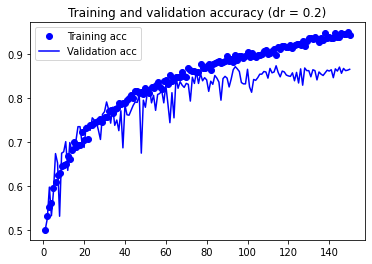

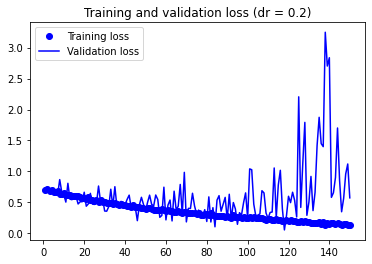

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy (dr = 0.2)')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (dr = 0.2)')
plt.legend()
plt.show()

In [ ]:
test1_datagen = ImageDataGenerator(rescale=1./255)

test_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/test'

test_generator = test1_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

model.evaluate_generator(test_generator)

Found 1000 images belonging to 2 classes.


[2.0598673820495605, 0.8510000109672546]

1. with 0.2 drop out rate, 150 epochs is not enough for model to be converged. It need more epochs, try 200 next time.

2. with 0.2 dropout rate, it still has overfitting problem. Try 0.35 next time.

3. the accuracy on test data increase 3.5% comparing to 0.5 dropout rate.

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_step_per_epochs,
    epochs = 200,
    validation_data = validation_generator,
    validation_steps = validation_step_per_epochs,
    callbacks = [lr_schedule]
)

Epoch 1/200
50/50 [==============================] - 454s 9s/step - loss: 0.7898 - acc: 0.4840 - val_loss: 0.6979 - val_acc: 0.5000
Epoch 2/200
50/50 [==============================] - 123s 2s/step - loss: 0.7101 - acc: 0.4945 - val_loss: 0.6897 - val_acc: 0.5040
Epoch 3/200
50/50 [==============================] - 122s 2s/step - loss: 0.6921 - acc: 0.5440 - val_loss: 0.6752 - val_acc: 0.5000
Epoch 4/200
50/50 [==============================] - 122s 2s/step - loss: 0.6897 - acc: 0.5590 - val_loss: 0.6354 - val_acc: 0.5030
Epoch 5/200
50/50 [==============================] - 122s 2s/step - loss: 0.7040 - acc: 0.5825 - val_loss: 0.6650 - val_acc: 0.6430
Epoch 6/200
50/50 [==============================] - 122s 2s/step - loss: 0.6698 - acc: 0.6095 - val_loss: 0.7028 - val_acc: 0.5120
Epoch 7/200
50/50 [==============================] - 122s 2s/step - loss: 0.6754 - acc: 0.5935 - val_loss: 0.6606 - val_acc: 0.5540
Epoch 8/200
50/50 [==============================] - 122s 2s/step - loss: 0.

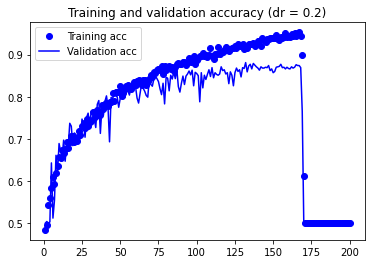

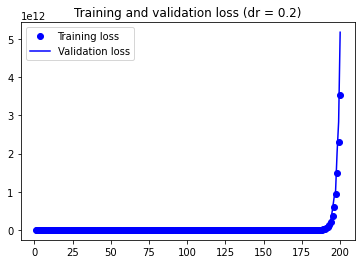

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy (dr = 0.2)')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (dr = 0.2)')
plt.legend()
plt.show()

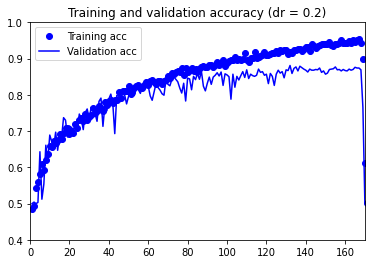

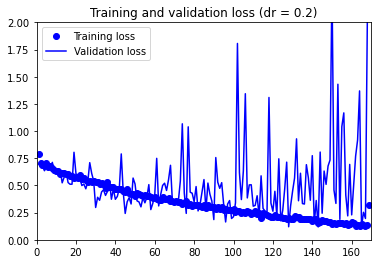

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy (dr = 0.2)')
plt.axis([0, 170, 0.4, 1])
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (dr = 0.2)')
plt.legend()
plt.axis([0, 170, 0, 2])
plt.show()

When training 0.35 dropout rate, I forgot to change lr_schedual function. So when epochs >= 167, lr < 0 (lr = 1e-3*(1 - 9*(epoch/150))). 

Apart from that 0.35 dropout rate is still not enough.

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_step_per_epochs,
    epochs = 200,
    validation_data = validation_generator,
    validation_steps = validation_step_per_epochs,
    callbacks = [lr_schedule]
)

Epoch 1/200
50/50 [==============================] - 127s 3s/step - loss: 0.7195 - acc: 0.5025 - val_loss: 0.6949 - val_acc: 0.5000
Epoch 2/200
50/50 [==============================] - 124s 2s/step - loss: 0.6944 - acc: 0.5350 - val_loss: 0.6879 - val_acc: 0.5210
Epoch 3/200
50/50 [==============================] - 125s 2s/step - loss: 0.6936 - acc: 0.5180 - val_loss: 0.6644 - val_acc: 0.5650
Epoch 4/200
50/50 [==============================] - 124s 2s/step - loss: 0.6824 - acc: 0.5605 - val_loss: 0.6972 - val_acc: 0.5090
Epoch 5/200
50/50 [==============================] - 125s 2s/step - loss: 0.6769 - acc: 0.5725 - val_loss: 0.6010 - val_acc: 0.6580
Epoch 6/200
50/50 [==============================] - 124s 2s/step - loss: 0.6487 - acc: 0.6000 - val_loss: 0.6107 - val_acc: 0.6260
Epoch 7/200
50/50 [==============================] - 125s 2s/step - loss: 0.6544 - acc: 0.6220 - val_loss: 0.5659 - val_acc: 0.6810
Epoch 8/200
50/50 [==============================] - 124s 2s/step - loss: 0.

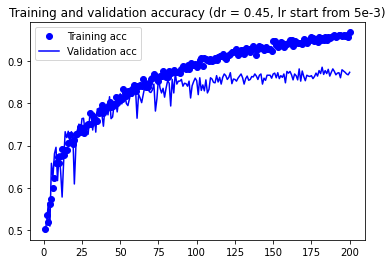

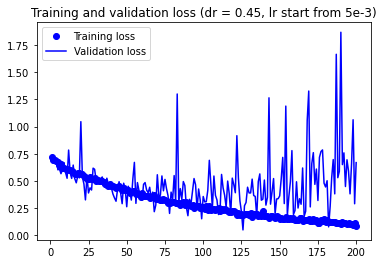

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy (dr = 0.45, lr start from 5e-3)')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (dr = 0.45, lr start from 5e-3)')
plt.legend()
plt.show()

In [ ]:
test1_datagen = ImageDataGenerator(rescale=1./255)

test_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/test'

test1_generator = test1_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

model.evaluate_generator(test1_generator)

Found 1000 images belonging to 2 classes.


[1.1332594156265259, 0.8690000176429749]

The accuracy on test set in crease around 2% compared to 0.2 dropout rate.
But it still has overfitting problem. 

0.45 dropout rate is not enough, or add other regularzation methods.

87% accuracy is the best accuracy I got for this problem

In [ ]:
model.save('cats_and_dogs_small.h5')